#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
file_path = "/content/drive/MyDrive/Datasets/US_Accidents_June20.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


# Data Preparation & Cleaning

In [5]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.shape

(3513617, 49)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [9]:
df.dtypes.value_counts()

,count
object,21
float64,14
bool,13
int64,1


In [10]:
numeric_values = ['int16','int32','int64','float16','float32','float64']
numeric_data = df.select_dtypes(include = numeric_values)
numeric_data

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.010,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.010,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.010,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.010,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.010,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,NaN,2,34.002480,-117.379360,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
3513613,NaN,2,32.766960,-117.148060,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
3513614,NaN,2,33.775450,-117.847790,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
3513615,NaN,2,33.992460,-118.403020,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [11]:
numeric_data.nunique()

,0
TMC,21
Severity,4
Start_Lat,1124695
Start_Lng,1113407
End_Lat,375074
End_Lng,383569
Distance(mi),13476
Number,40365
Temperature(F),831
Wind_Chill(F),974


In [12]:
df.isnull().sum().sort_values(ascending = False)

,0
End_Lng,2478818
End_Lat,2478818
Number,2262864
Precipitation(in),2025874
Wind_Chill(F),1868249
TMC,1034799
Wind_Speed(mph),454609
Weather_Condition,76138
Visibility(mi),75856
Humidity(%),69687


In [13]:
# Total missing values
total_missing_values = df.isnull().sum().sum()
total_missing_values

13061803

In [14]:
# Percentage of overall missing data
percentage_of_missing_values = (total_missing_values / len(df))*100
percentage_of_missing_values

371.74805905139914

In [15]:
# Percentange of missing data column wise
missing_percentage_per_column = (df.isnull().sum().sort_values(ascending = False)/ len(df))*100
missing_percentage_per_column

,0
End_Lng,70.548896
End_Lat,70.548896
Number,64.402694
Precipitation(in),57.657793
Wind_Chill(F),53.171675
TMC,29.451104
Wind_Speed(mph),12.938490
Weather_Condition,2.166941
Visibility(mi),2.158915
Humidity(%),1.983341


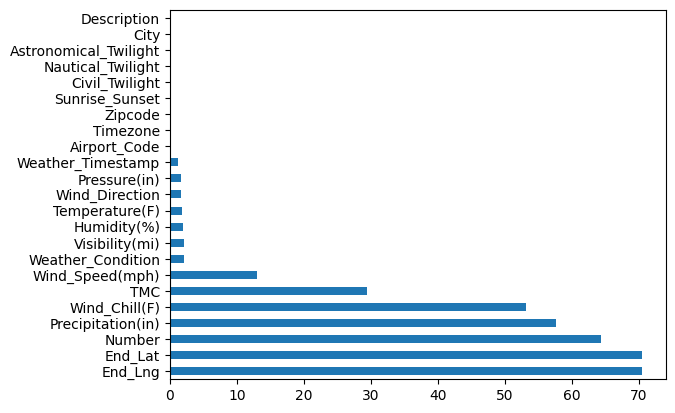

In [16]:
# Missing value graph
missing_percentage_per_column[missing_percentage_per_column!=0].plot(kind = 'barh')
plt.show()

# Removing columns with missing values >= 50%

In [18]:
df_cleaned = df.drop(columns = missing_percentage_per_column[missing_percentage_per_column > 50].index)
df_cleaned

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [19]:
df_cleaned.shape

(3513617, 44)

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Humidity(%)            float64
 22  Pressure(in)      

In [21]:
df_cleaned.isnull().sum()

,0
ID,0
Source,0
TMC,1034799
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,1


In [22]:
(df_cleaned.isnull().sum().sort_values(ascending = False)/len(df))*100

,0
TMC,29.451104
Wind_Speed(mph),12.938490
Weather_Condition,2.166941
Visibility(mi),2.158915
Humidity(%),1.983341
Temperature(F),1.870779
Wind_Direction,1.675595
Pressure(in),1.590441
Weather_Timestamp,1.233003
Airport_Code,0.192337


# EDA & VISUALIZATION

In [23]:
df_cleaned.describe()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.447885e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,2.816167e-01,6.193512e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,1.550134e+00,1.862106e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,0.000000e+00,5.000000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,0.000000e+00,6.400000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,1.000000e-02,7.590000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02


Insights

---


1. Most accidents are of moderate severity (Severity 2), with fewer severe accidents.
2. Accidents tend to occur within short distances, typically less than a mile, possibly near intersections or areas of heavy traffic.
3. Moderate temperatures and higher humidity levels are common conditions during accidents, suggesting that weather may play a role.
4. Visibility is generally good during accidents, but poor visibility is present in some extreme cases.
5. Wind speed is generally mild, though there are instances of high wind speeds which may increase the risk of accidents.




How many cities are there in this dataset?

In [24]:
df_cleaned.City

,City
0,Dayton
1,Reynoldsburg
2,Williamsburg
3,Dayton
4,Dayton
...,...
3513612,Riverside
3513613,San Diego
3513614,Orange
3513615,Culver City


In [25]:
cities = df_cleaned.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Paron',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [26]:
len(cities)

11896

In [27]:
df_cleaned['City'].nunique()

11895

There are total 11895 cities in this dataset.

In [28]:
city_count = df_cleaned['City'].value_counts()
city_count

,count
City,
Houston,101240
Los Angeles,79169
Charlotte,78952
Dallas,64790
Austin,63889
...,...
Dilley,1
Dunnville,1
Rock Hall,1


Top 10 cities with the most number of accidents?

In [29]:
top_cities = df_cleaned['City'].value_counts().head(10)
top_cities

,count
City,
Houston,101240
Los Angeles,79169
Charlotte,78952
Dallas,64790
Austin,63889
Raleigh,44675
Atlanta,41126
Oklahoma City,36340
Miami,34549


In [30]:
sns.set_style("darkgrid")

<ipython-input-31-e4fb5de4c50e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_cities , y = top_cities.index , palette = color)


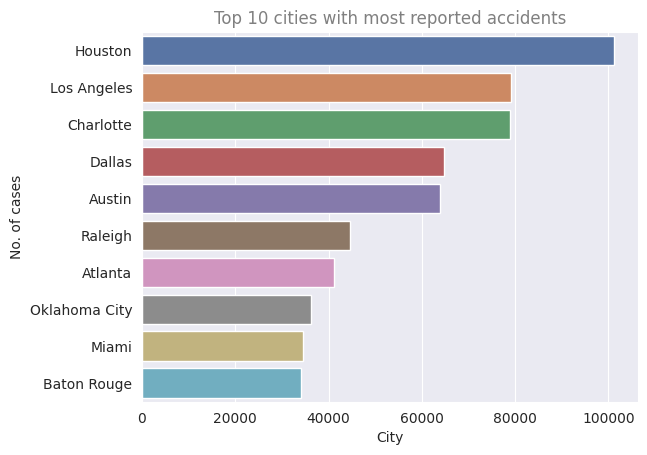

In [31]:
color = sns.color_palette("deep",len(top_cities))
sns.barplot(x = top_cities , y = top_cities.index , palette = color)
plt.title("Top 10 cities with most reported accidents",color = "grey")
plt.xlabel('City')
plt.ylabel('No. of cases')
plt.show()

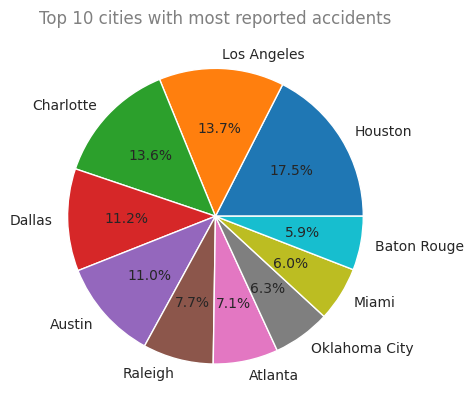

In [32]:
plt.pie(top_cities , labels = top_cities.index , autopct='%1.1f%%')
plt.title("Top 10 cities with most reported accidents",color = "grey")
plt.show()

Insight

---

- Houston had most no. of accident cases i.e 101240.


Cities in US which has the least number of accident cases?

In [33]:
city_min_acc=city_count[city_count<10000]
city_min_acc.tail()

,count
City,
Dilley,1
Dunnville,1
Rock Hall,1
Teachey,1
American Fork-Pleasant Grove,1


<ipython-input-34-19b64e0372ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city_min_acc)


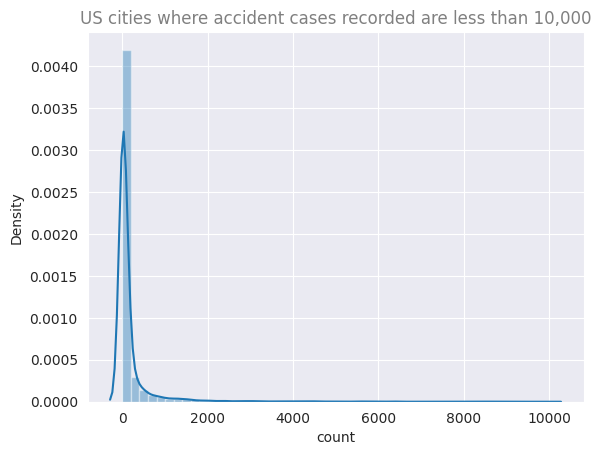

In [34]:
sns.distplot(city_min_acc)
plt.title("US cities where accident cases recorded are less than 10,000",color="grey")
plt.show()

Which state has more no of accidents?

In [35]:
acc_in_state_count=df_cleaned['State'].value_counts()
acc_in_state_count

,count
State,
CA,816825
TX,329284
FL,258002
SC,173277
NC,165958
NY,160817
PA,106787
IL,99692
VA,96075


Top 10 state of US having max no of accidents

In [36]:
max_acc_state=acc_in_state_count.head(10)
max_acc_state

,count
State,
CA,816825
TX,329284
FL,258002
SC,173277
NC,165958
NY,160817
PA,106787
IL,99692
VA,96075


<ipython-input-37-ec09fce7f2f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=max_acc_state.index, x=max_acc_state,palette = color)


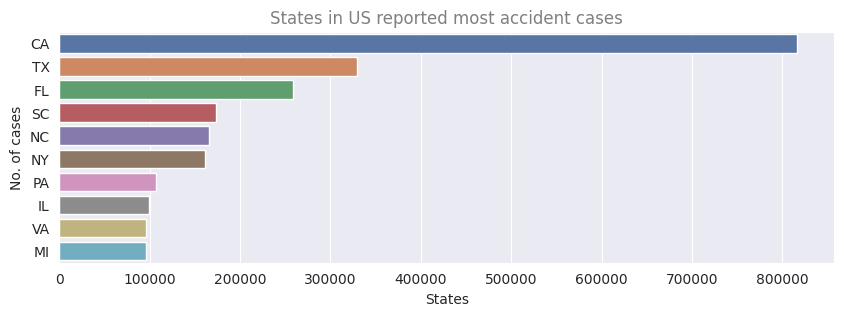

In [37]:
plt.figure(figsize=(10,3))
sns.barplot(y=max_acc_state.index, x=max_acc_state,palette = color)
plt.title("States in US reported most accident cases",color="grey")
plt.xlabel('States')
plt.ylabel('No. of cases')
plt.show()

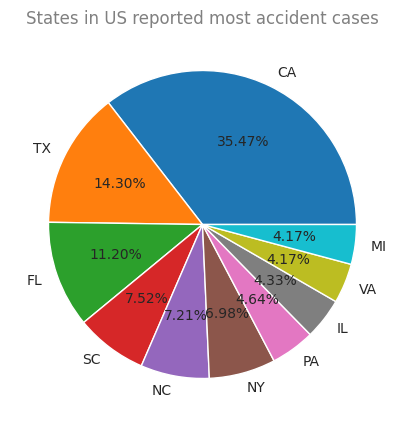

In [38]:
plt.figure(figsize=(12,5))
plt.pie(max_acc_state,labels=max_acc_state.index,autopct='%.2f%%')
plt.title("States in US reported most accident cases",color="grey")
plt.show()

Insight

---





- CA had most no of accident cases i.e 816825.


Which timezone reported the most number of accident cases?

In [39]:
timezone_max_acc=df_cleaned['Timezone'].value_counts()
timezone_max_acc

,count
Timezone,
US/Eastern,1484854
US/Pacific,986859
US/Central,837122
US/Mountain,200902


<ipython-input-40-5976e58868fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=timezone_max_acc.index, x=timezone_max_acc,palette = color)
<ipython-input-40-5976e58868fe>:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(y=timezone_max_acc.index, x=timezone_max_acc,palette = color)


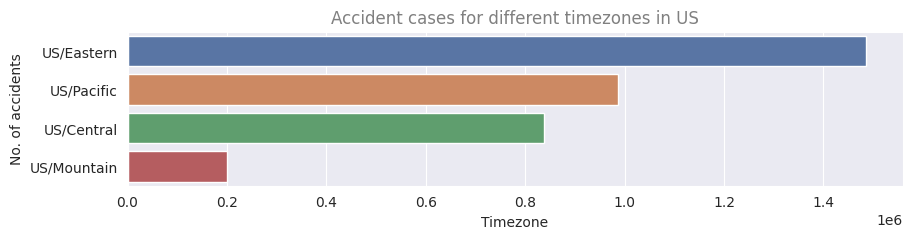

In [40]:
plt.figure(figsize=(10,2))
sns.barplot(y=timezone_max_acc.index, x=timezone_max_acc,palette = color)
plt.title("Accident cases for different timezones in US",color="grey")
plt.xlabel('Timezone')
plt.ylabel('No. of accidents')
plt.show()

Insight

---



- US/Eastern timezone region reported the most number of accident cases



In [41]:
df_cleaned.Street

,Street
0,I-70 E
1,Brice Rd
2,State Route 32
3,I-75 S
4,Miamisburg Centerville Rd
...,...
3513612,Pomona Fwy E
3513613,I-8 W
3513614,Garden Grove Fwy
3513615,San Diego Fwy S


Which street had most accident in US?



In [42]:
street_acc_count=df_cleaned['Street'].value_counts()
street_max_acc=street_acc_count.head(10)
street_max_acc

,count
Street,
I-5 N,41264
I-95 N,35593
I-95 S,29517
I-10 E,26107
I-10 W,25045
I-5 S,23934
I-80 W,20680
I-405 N,19615
I-80 E,18977


<ipython-input-43-f2cc02ee522e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=street_max_acc.index, x=street_max_acc,palette = color)


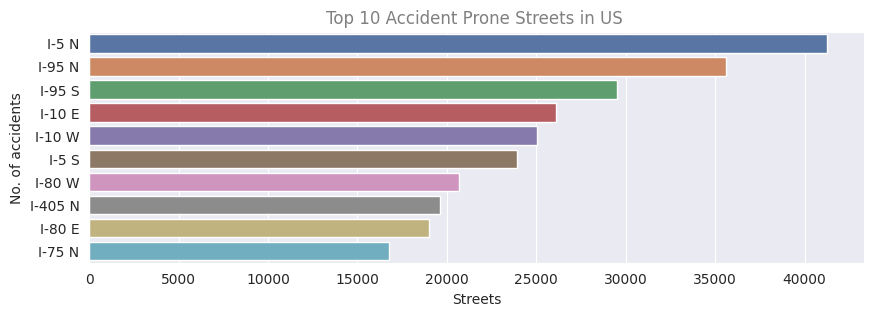

In [43]:
plt.figure(figsize=(10,3))
sns.barplot(y=street_max_acc.index, x=street_max_acc,palette = color)
plt.title("Top 10 Accident Prone Streets in US ",color="grey")
plt.xlabel('Streets')
plt.ylabel('No. of accidents')
plt.show()

Insight


---


- I-5 N street had max accident cases i.e 41264.

In [44]:
df_cleaned.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
3513612,2019-08-23 18:03:25
3513613,2019-08-23 19:11:30
3513614,2019-08-23 19:00:21
3513615,2019-08-23 19:00:21


In [45]:
df_cleaned['Start_Time'].value_counts().head()

,count
Start_Time,
2017-05-15 09:22:55,74
2018-11-25 01:22:49,53
2019-10-26 08:45:17,49
2018-11-12 00:37:27,40
2018-12-18 07:11:45,37


In [46]:
type(df_cleaned.Start_Time[0])

str

In [47]:
df_cleaned.Start_Time = pd.to_datetime(df_cleaned.Start_Time)
type(df_cleaned.Start_Time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
df_cleaned.Start_Time[0].hour

5

In [49]:
time_max_acc=df_cleaned.Start_Time.dt.hour.value_counts()
time_max_acc

,count
Start_Time,
8,326257
7,316352
17,264893
16,256542
15,215566
9,202664
18,201968
6,198679
10,182608


Text(0, 0.5, 'No. of accidents')

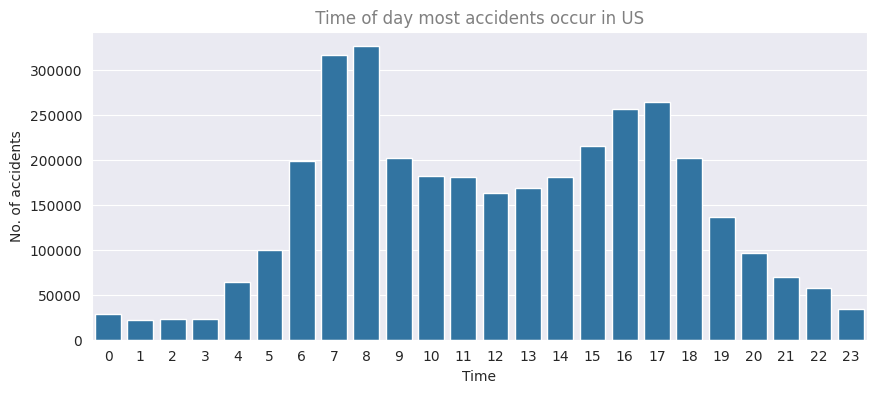

In [50]:
plt.figure(figsize=(10,4))
sns.barplot(y=time_max_acc, x=time_max_acc.index)
plt.title(" Time of day most accidents occur in US ",color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')

Insight

---

- A high percentage of accidents occur between 7 am to 10 am (probably people are in a hurry to commute to work)
- Next highest percentage is 3 pm to 7 pm.

On which day of the week most accident occurs?



In [51]:
weekday_max_acc=df_cleaned.Start_Time.dt.day_name().value_counts()
weekday_max_acc

,count
Start_Time,
Friday,639706
Tuesday,631136
Wednesday,624429
Thursday,621677
Monday,592871
Saturday,214483
Sunday,189315


<ipython-input-54-4e1cc8540543>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weekday_max_acc, x=weekday_max_acc.index,palette = color)
<ipython-input-54-4e1cc8540543>:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(y=weekday_max_acc, x=weekday_max_acc.index,palette = color)


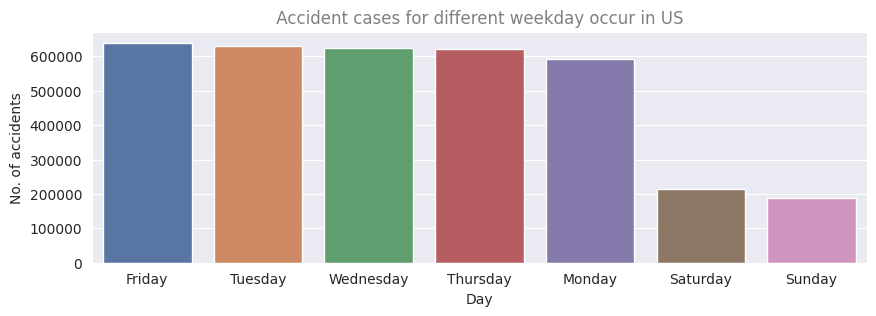

In [54]:
plt.figure(figsize=(10,3))
sns.barplot(y=weekday_max_acc, x=weekday_max_acc.index,palette = color)
plt.title(" Accident cases for different weekday occur in US ",color="grey")
plt.xlabel('Day')
plt.ylabel('No. of accidents')
plt.show()

Insight

---

- Friday had the highest no of accident cases i.e 639706.
- Accident cases are less during weekends i.e satuday and sunday and evenly distributed during business days.

Month-wise trend of accidents:

In which month most accident occurs ?



In [61]:
month_max_acc=df_cleaned.Start_Time.dt.month_name().value_counts()
month_max_acc

,count
Start_Time,
October,324545
June,310322
January,301924
December,299623
April,299498
November,299056
May,296545
March,293389
September,292420


<ipython-input-63-d8aaa35eb8ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=month_max_acc, x=month_max_acc.index, palette = color)
<ipython-input-63-d8aaa35eb8ea>:2: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=month_max_acc, x=month_max_acc.index, palette = color)


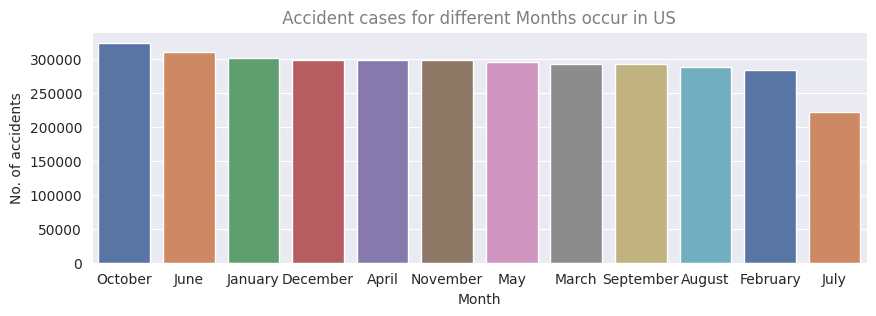

In [63]:
plt.figure(figsize=(10,3))
sns.barplot(y=month_max_acc, x=month_max_acc.index, palette = color)
plt.title(" Accident cases for different Months occur in US ",color="grey")
plt.xlabel('Month')
plt.ylabel('No. of accidents')
plt.show()

Insight

---

- Most no. of cases are occured during October i.e 324545.
- The data is pretty balanced over each and every month.


<ipython-input-56-2b6720e80389>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2016.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


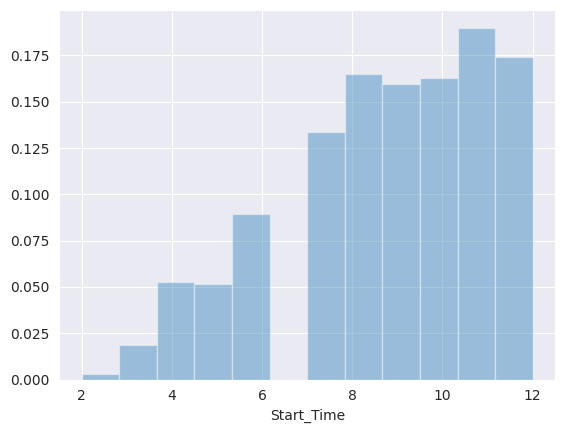

In [56]:
df_2016 = df_cleaned[df_cleaned.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.show()

<ipython-input-57-d57df7b844dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2017.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


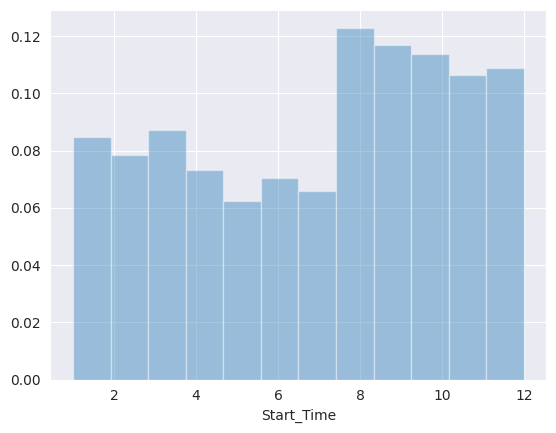

In [57]:
df_2017 = df_cleaned[df_cleaned.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.show()

<ipython-input-58-65dee010827a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


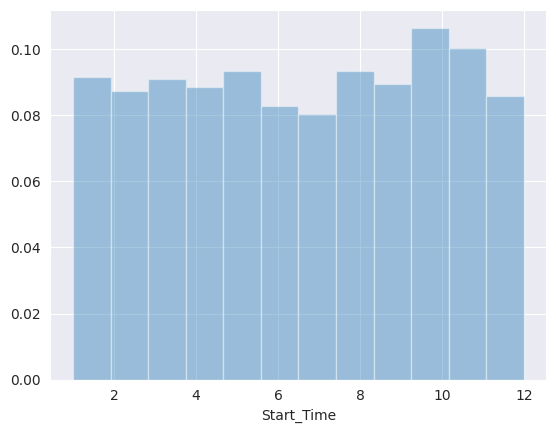

In [58]:
df_2018 = df_cleaned[df_cleaned.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.show()

<ipython-input-59-80372332bbc6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


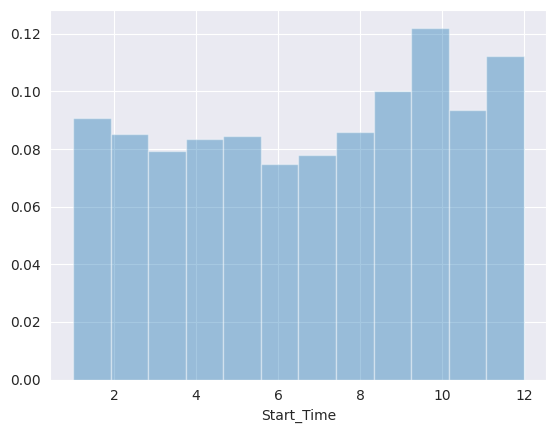

In [59]:
df_2019 = df_cleaned[df_cleaned.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.show()

<ipython-input-60-612151b671a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)


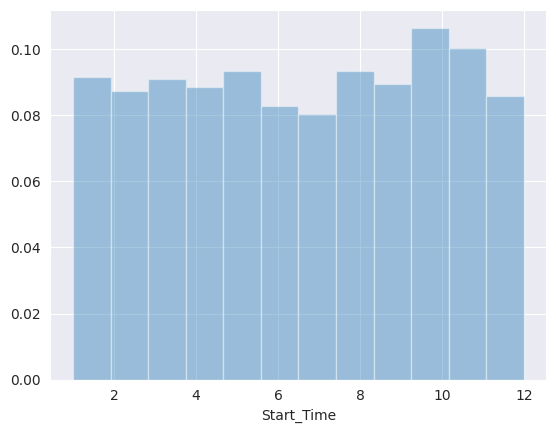

In [60]:
df_2020 = df_cleaned[df_cleaned.Start_Time.dt.year == 2020]
sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
plt.show()

Year wise trend of accidents:

In [64]:
year_max_acc=df_cleaned.Start_Time.dt.year.value_counts()
year_max_acc

,count
Start_Time,
2019,953733
2018,892615
2017,717489
2020,539187
2016,410593


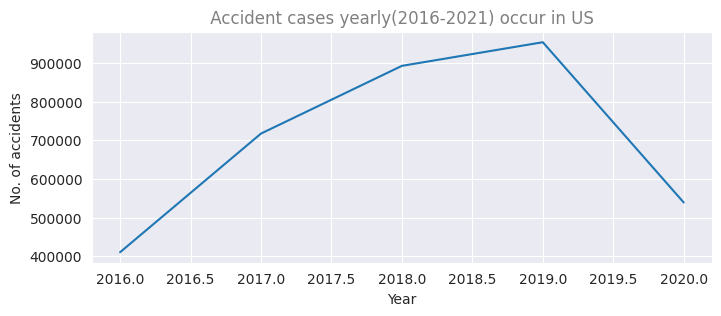

In [65]:
plt.figure(figsize=(8,3))
sns.lineplot(data=year_max_acc)
plt.title(" Accident cases yearly(2016-2021) occur in US ",color="grey")
plt.xlabel('Year')
plt.ylabel('No. of accidents')
plt.show()

Insight

---

- The no. of accidents were increasing from 2016-2019.
- Highest no. of accidents occured in 2019 i.e 953733.
- Lowest in 2016 and 2020,maybe because of invalid or missing data.

Is there any effect of temperature on accidents?



In [66]:
weather_cond=df_cleaned["Temperature(F)"].value_counts()
weather_cond.sort_values().tail(10)

,count
Temperature(F),
66.0,61665
75.0,63140
64.0,63454
70.0,63667
72.0,64092
63.0,64722
73.0,67819
59.0,72519
77.0,75531


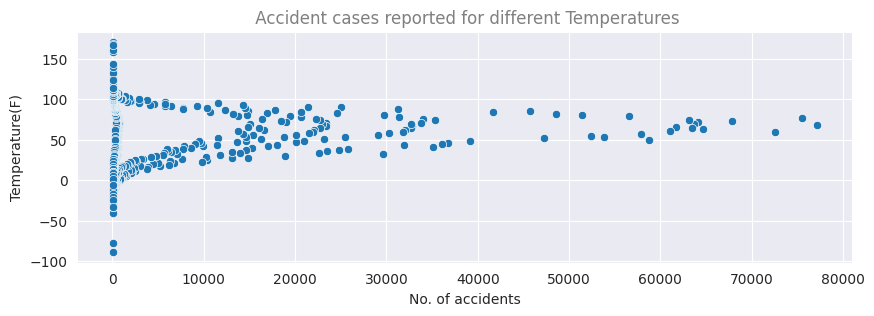

In [67]:
plt.figure(figsize=(10,3))
plt.title(" Accident cases reported for different Temperatures",color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Temperature(F)')
sns.scatterplot(y=weather_cond.index, x=weather_cond)
plt.show()

Insight

---
- Maximum no of cases occured between temperature range: 50-80 F.


Is there any effect of humidity on accidents?


In [68]:
humidity_effect=df_cleaned["Humidity(%)"].value_counts()
humidity_effect.sort_values().tail()

,count
Humidity(%),
89.0,64531
87.0,77572
90.0,77591
93.0,132465
100.0,139900


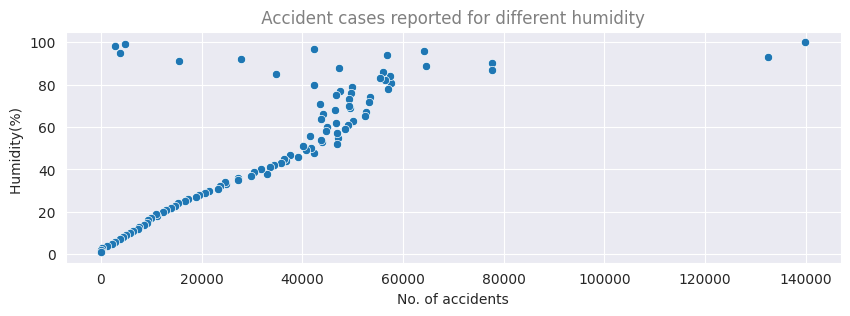

In [69]:
plt.figure(figsize=(10,3))
plt.title(" Accident cases reported for different humidity ",color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Humidity(%) ')
sns.scatterplot(y=humidity_effect.index, x=humidity_effect)
plt.show()

Insight

---



- Maximum no of cases occured between humidity range: 80-100 %.
- As the humidity increases the no of cases also increases.

Is there any effect of windspeed on accidents?



In [70]:
windspeed_effect=df_cleaned["Wind_Speed(mph)"].value_counts()
windspeed_effect.sort_values().tail()

,count
Wind_Speed(mph),
6.9,201257
3.5,203424
5.8,215965
0.0,217426
4.6,217448


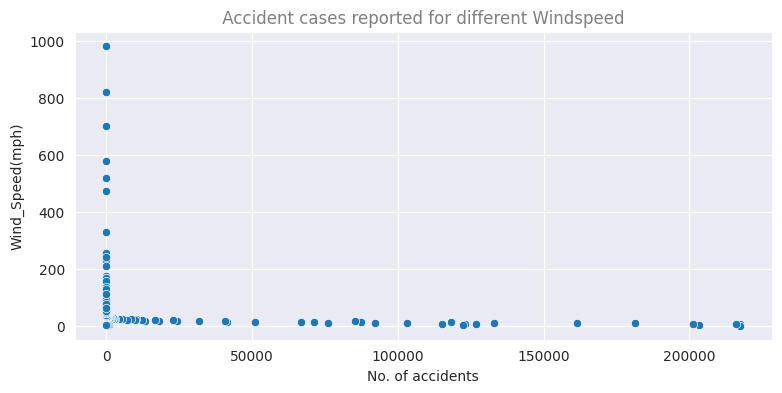

In [71]:
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different Windspeed ",color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Wind_Speed(mph)')
sns.scatterplot(y=windspeed_effect.index, x=windspeed_effect)
plt.show()

Insight

---



- Maximum cases occured for the wind speed range between 5(mph) - 10(mph).
- This is normal wind speed.


Is there any effect of Pressure on accidents?

In [72]:
pressure_effect=df_cleaned["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()

,count
Pressure(in),
29.94,66479
30.04,68220
29.96,69547
29.99,69561
30.01,71148


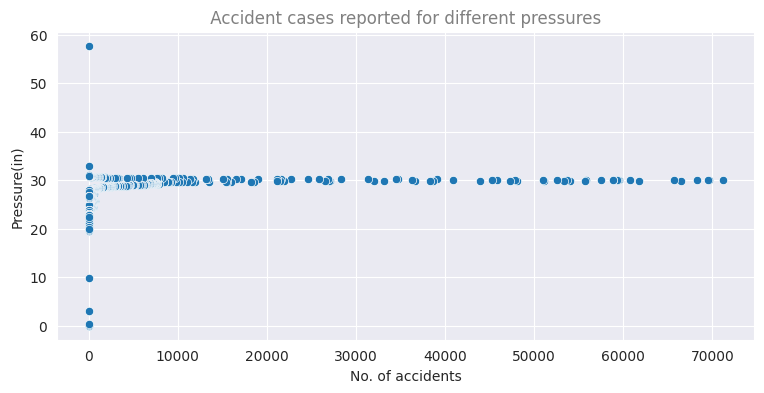

In [73]:
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different pressures ",color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect)
plt.show()

Insight

---

- Max no of accident occured when the air pressureis between 20(in) to 30(in).
- 30(in) had max accidents.

Is there any effect of Weather_Conditions on accidents?


In [74]:
weather_effect=df_cleaned["Weather_Condition"].value_counts()
weather=weather_effect.head(10)
weather

,count
Weather_Condition,
Clear,808202
Fair,547721
Mostly Cloudy,488094
Overcast,382485
Partly Cloudy,344815
Cloudy,212878
Scattered Clouds,204660
Light Rain,176942
Light Snow,50435


<ipython-input-75-c9733a2b7185>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather, y=weather.index,palette = color)


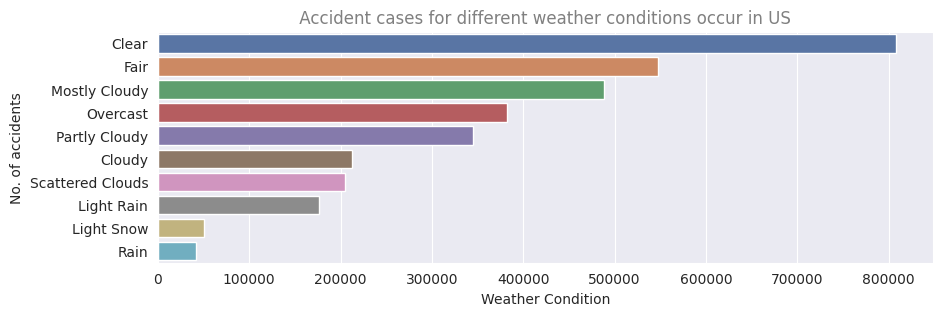

In [75]:
plt.figure(figsize=(10,3))
sns.barplot(x=weather, y=weather.index,palette = color)
plt.title(" Accident cases for different weather conditions occur in US ",color="grey")
plt.xlabel('Weather Condition')
plt.ylabel('No. of accidents')
plt.show()

Insight

---

- Weather condition was Fair in most of the cases hence it is not a major cause behind the accidents.
